In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#import do drive pra trazer a base

#url dataset: https://archive.ics.uci.edu/ml/datasets/Mushroom

Mounted at /content/drive


In [ ]:
#imports
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Atividade 1

##Funções

In [ ]:
#Funções
def UpdateMissingValues(df, column, method, number=0):
    if method == 'number':
        # Substituindo valores ausentes por um número
        df[column].fillna(number, inplace=True)
    elif method == 'median':
        # Substituindo valores ausentes pela mediana 
        median = df['Density'].median()
        df[column].fillna(median, inplace=True)
    elif method == 'mean':
        # Substituindo valores ausentes pela média
        mean = df[column].mean()
        df[column].fillna(mean, inplace=True)
    elif method == 'mode':
        # Substituindo valores ausentes pela moda
        mode = df[column].mode()[0]
        df[column].fillna(mode, inplace=True)

##Código

In [ ]:
# Faz a leitura do arquivo
names = ['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root',   
          'stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color',              
          'ring-number','ring-type','spore-print-color','population','habitat'] 
features = ['odor','spore-print-color','stalk-surface-below-ring','stalk-color-above-ring','habitat','cap-color','population'] #AS FEATURES NÃO FUNCIONA ERRO DE QTD DE NAMES E FEATURES DIFERENTES
target = 'target'
output_file = '/content/drive/My Drive/MDAEL8/agaricus-lepiotaOUT.data'
input_file = '/content/drive/My Drive/MDAEL8/agaricus-lepiota.data'
df = pd.read_csv(input_file,         # Nome do arquivo com dados
                 names = names,      # Nome das colunas 
                 na_values='?')[features]      # Define que ? será considerado valores ausentes
    
df_original = df.copy()
# # Imprime as 15 primeiras linhas do arquivo
# print("PRIMEIRAS 15 LINHAS\n")
# print(df.head(15))
# print("\n")        

# # Imprime informações sobre dos dados
# print("INFORMAÇÕES GERAIS DOS DADOS\n")
# print(df.info())
# print("\n")
    
# # Imprime uma analise descritiva sobre dos dados
# print("DESCRIÇÃO DOS DADOS\n")

# print(df.describe())
# print("\n")

# # Imprime a quantidade de valores faltantes por coluna
# print("VALORES FALTANTES\n")
# print(df.isnull().sum())
# print("\n")    

columns_missing_value = df.columns[df.isnull().any()]
# print(columns_missing_value)
method = 'mode' # number or median or mean or mode

#para esse caso como os dados não são numéricos o melhor método de subst é a moda
#nas opções disponiveis/opções válidas para dados numéricos

for c in columns_missing_value:
    UpdateMissingValues(df, c, method='mode')
    
# print(df.describe())
# print("\n")
# print(df.head(15))
# print(df_original.head(15))
# print("\n")
    
# Salva arquivo com o tratamento para dados faltantes
df.to_csv(output_file, header=False, index=False)  

#Atividade 2

##Funções

In [ ]:
def ShowInformationDataFrame(df, message=""):
    print(message+"\n")
    print(df.info())
    print(df.describe())
    print(df.head(10))
    print("\n") 

def VisualizePcaProjection_2D(finalDf, targetColumn):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = [0, 1]
    colors = ['black', 'lightsalmon']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf[targetColumn] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
                   finalDf.loc[indicesToKeep, 'principal component 2'],
                   c = color, s = 50)
    ax.legend(targets)
    ax.grid()
    plt.show()

##Código

Explained variance per component:
[0.35989521312330375, 0.21426506046146837, 0.16051393286946652, 0.11886119765088722, 0.0927473044665595, 0.03011624797951474, 0.019403915907779845, 0.004197127541020166]





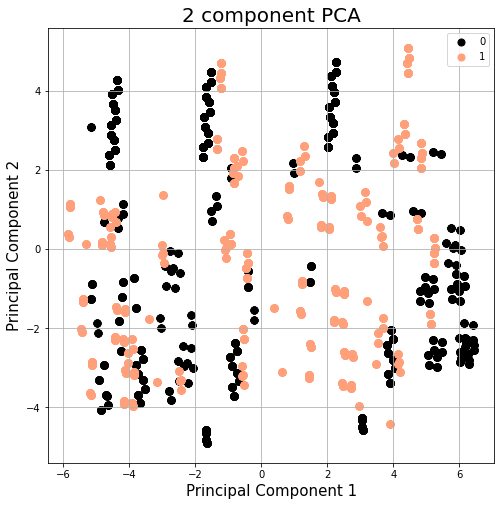

,principal component 1,principal component 2,target
0,-4.399930,0.687121,1
1,6.285046,-2.905461,0
2,4.820859,-1.317210,0
3,3.166385,1.201089,1
4,-0.873092,-3.487452,0
...,...,...,...
8119,-4.837319,-4.057417,0
8120,-4.896800,-3.303508,0
8121,-4.837319,-4.057417,0
8122,-3.888605,-3.953231,1


In [ ]:
df = pd.read_csv(input_file,         # Nome do arquivo com dados
                 names = names,      # Nome das colunas 
                 na_values='?')[features]      # Define que ? será considerado valores ausentes

#Dicionários

odor_dic = {'a':1,'l':2,'c':3,'y':4,'f':5,'m':6,'n':7,'p':8,'s':9}
df['odor']=df['odor'].replace(odor_dic)

spore_dic = {'k':1,'n':2,'h':3,'r':4,'o':5,'u':6,'w':7,'y':8,'b':9}
df['spore-print-color']=df['spore-print-color'].replace(spore_dic)

surface_dic = {'f':1,'y':2,'k':3,'s':4}
df['stalk-surface-below-ring']=df['stalk-surface-below-ring'].replace(surface_dic)

color_dic = {'n':1,'b':2,'c':3,'g':4,'o':5,'p':6,'e':7,'w':8,'y':9}
df['stalk-color-above-ring']=df['stalk-color-above-ring'].replace(color_dic)

habitat_dic = {'g':1,'l':2,'m':3,'p':4,'u':5,'w':6,'d':7}
df['habitat']=df['habitat'].replace(habitat_dic)

cap_dic = {'n':1,'b':2,'c':3,'g':4,'r':5,'p':6,'u':7,'e':8,'w':9,'y':10}
df['cap-color']=df['cap-color'].replace(cap_dic)

population_dic = {'a':1,'c':2,'n':3,'s':4,'v':5,'y':6}
df['population']=df['population'].replace(population_dic)

ix = df.index
df['target']=ix
df['target']=df['target'].replace({'e':0,'p':1})

df = df.reset_index()
df = df.drop(['index'], axis=1)

x=df.loc[:,features].values

# Mix-Max normalization
x_minmax = MinMaxScaler().fit_transform(x)
normalized2Df = pd.DataFrame(data = x_minmax, columns = features)
normalized2Df = pd.concat([normalized2Df, df[[target]]], axis = 1)


pca = PCA()    
principalComponents = pca.fit_transform(df)
print("Explained variance per component:")
print(pca.explained_variance_ratio_.tolist())
print("\n\n")


principalDf = pd.DataFrame(data = principalComponents[:,0:2], 
                            columns = ['principal component 1', 
                                       'principal component 2'])

finalDf = pd.concat([principalDf, df[[target]]], axis = 1)    

VisualizePcaProjection_2D(finalDf, target)

finalDf

In [ ]:
# df = px.data.iris()
X=df[features]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

group_color = ['black', 'lightsalmon']

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['target'].apply(str),
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    color_discrete_sequence = group_color
)
fig.show()

#Atividade 3

In [ ]:
df.population.value_counts()

df_histograma = pd.DataFrame(df.population.value_counts())
df_histograma = df_histograma.reset_index(level=0).rename(columns={"index": "Classe","population":"absoluta"}).sort_values(by=['Classe'])
soma = df_histograma["absoluta"].sum()
df_histograma["% absoluta"] = round((df_histograma["absoluta"]/soma)*100,2)
df_histograma["acumulado"] = df_histograma["absoluta"].cumsum()
df_histograma["% acumulado"] = df_histograma["% absoluta"].cumsum()

df_histograma

,Classe,absoluta,% absoluta,acumulado,% acumulado
4,1,384,4.73,384,4.73
5,2,340,4.19,724,8.92
3,3,400,4.92,1124,13.84
2,4,1248,15.36,2372,29.20
0,5,4040,49.73,6412,78.93
1,6,1712,21.07,8124,100.00


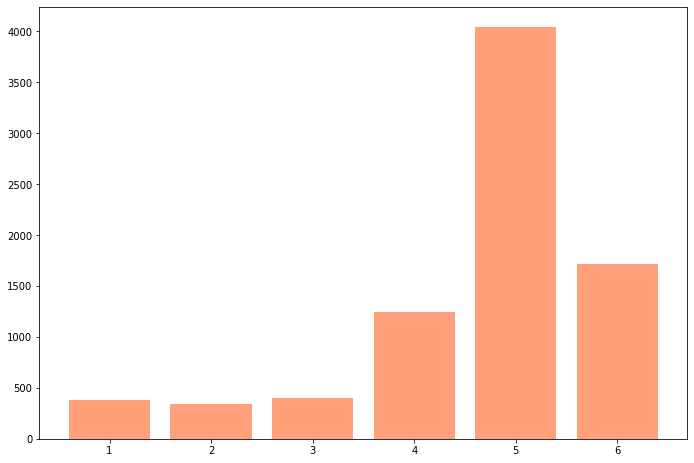

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.bar(df_histograma.Classe,df_histograma.absoluta, color=['lightsalmon'])
plt.show()

# Atividade 4

In [ ]:
print("Medidas de tendência centrais")
#Só vale a pena a moda, pois todas as colunas são classificatórias
print("Moda de cada coluna:")
display(df.mode())

Medidas de tendência centrais
Moda de cada coluna:


,odor,spore-print-color,stalk-surface-below-ring,stalk-color-above-ring,habitat,cap-color,population,target
0,7,7,4,8,7,1,5,0


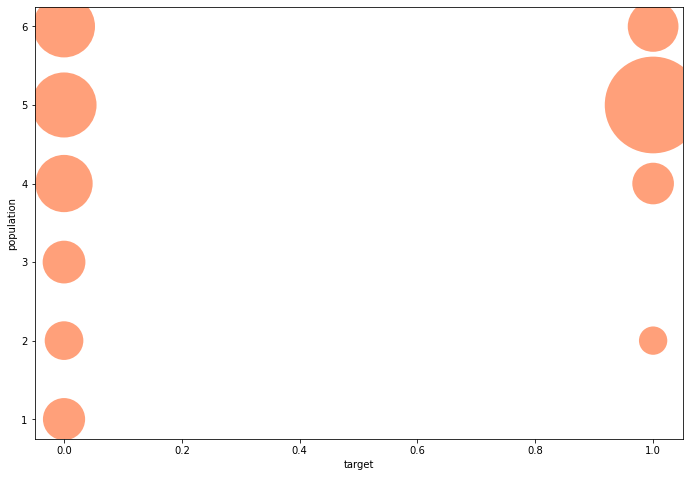

In [ ]:
#gráfico dispersão

df_dispersao = df[["population","target"]]
df_dispersao = df_dispersao.groupby(['population', 'target']).size().reset_index(name="qtd")
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])

ax = sns.scatterplot(data=df_dispersao, x="target", y="population", size="qtd", legend=False, sizes=(1000, 10000), color=['lightsalmon'])

# plt.scatter(df.target, df.population)
plt.show()
